### Importing Libraries

In [170]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

### Load and Preprocess the data

In [171]:
data = pd.read_csv("Queries.csv")

In [172]:
display(data.head())

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02
2,python projects with source code,2077,73380,2.83%,5.94
3,classification report in machine learning,2012,4959,40.57%,1.28
4,the clever programmer,1931,2528,76.38%,1.09


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [174]:
data.columns

Index(['Top queries', 'Clicks', 'Impressions', 'CTR', 'Position'], dtype='object')

In [175]:
data.shape

(1000, 5)

In [176]:
# Checking Null Value

data.isnull().sum()

Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64

In [177]:
# Checking duplicate values

data.duplicated().sum()

0

In [178]:
# Checking descriptive statistics

data.describe()

,Clicks,Impressions,Position
count,1000.0000,1000.000000,1000.000000
mean,172.2750,1939.466000,3.985930
std,281.0221,4856.702605,2.841842
min,48.0000,62.000000,1.000000
25%,64.0000,311.000000,2.010000
50%,94.0000,590.500000,3.120000
75%,169.0000,1582.750000,5.342500
max,5223.0000,73380.000000,28.520000


### Q.2: Now convert the CTR column from a percentage string to a float

In [179]:
data['CTR'] = data['CTR'].str.rstrip('%').astype('float') / 100

In [180]:
data.head()

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
3,classification report in machine learning,2012,4959,0.4057,1.28
4,the clever programmer,1931,2528,0.7638,1.09


### Q.3: Now analyze common words in each search query in the following manner:
* Create a function to clean and split the queries into words.
* Split each query into words and count the frequency of each word.
* Plot the word frequencies

In [181]:
def clean_split(query):
    return re.findall(r'\b\w+\b', query.lower())

all_words = data['Top queries'].apply(clean_split).sum()
word_freq = Counter(all_words)

print(f"ALl words are: {all_words}")
print(f"Word Frequency are: {word_freq}")

ALl words are: ['number', 'guessing', 'game', 'python', 'thecleverprogrammer', 'python', 'projects', 'with', 'source', 'code', 'classification', 'report', 'in', 'machine', 'learning', 'the', 'clever', 'programmer', 'standard', 'scaler', 'in', 'machine', 'learning', 'aman', 'kharwal', 'python', 'turtle', 'graphics', 'code', 'python', 'game', 'projects', 'with', 'source', 'code', '82', 'python', 'projects', 'with', 'source', 'code', 'guess', 'the', 'number', 'python', 'clever', 'programmer', 'car', 'price', 'prediction', 'using', 'machine', 'learning', 'aman', 'kharwal', 'data', 'science', 'mentor', 'random_state', '42', 'rock', 'paper', 'scissors', 'python', 'applications', 'of', 'unsupervised', 'learning', 'stress', 'detection', 'using', 'machine', 'learning', 'python', 'number', 'guessing', 'game', 'guessing', 'game', 'python', 'hangman', 'game', 'in', 'python', 'classification', 'report', 'guess', 'the', 'number', 'game', 'python', 'earthquake', 'prediction', 'using', 'machine', 'lea

In [182]:
most_common_words = word_freq.most_common(20)
words, frequencies = zip(*most_common_words)

In [183]:
most_common_words

[('python', 562),
 ('in', 232),
 ('code', 138),
 ('learning', 133),
 ('machine', 123),
 ('using', 105),
 ('game', 103),
 ('number', 95),
 ('to', 82),
 ('prediction', 70),
 ('project', 68),
 ('analysis', 66),
 ('with', 53),
 ('the', 50),
 ('how', 50),
 ('c', 49),
 ('detection', 45),
 ('guessing', 43),
 ('source', 43),
 ('classification', 43)]

In [184]:
words

('python',
 'in',
 'code',
 'learning',
 'machine',
 'using',
 'game',
 'number',
 'to',
 'prediction',
 'project',
 'analysis',
 'with',
 'the',
 'how',
 'c',
 'detection',
 'guessing',
 'source',
 'classification')

In [185]:
frequencies

(562,
 232,
 138,
 133,
 123,
 105,
 103,
 95,
 82,
 70,
 68,
 66,
 53,
 50,
 50,
 49,
 45,
 43,
 43,
 43)

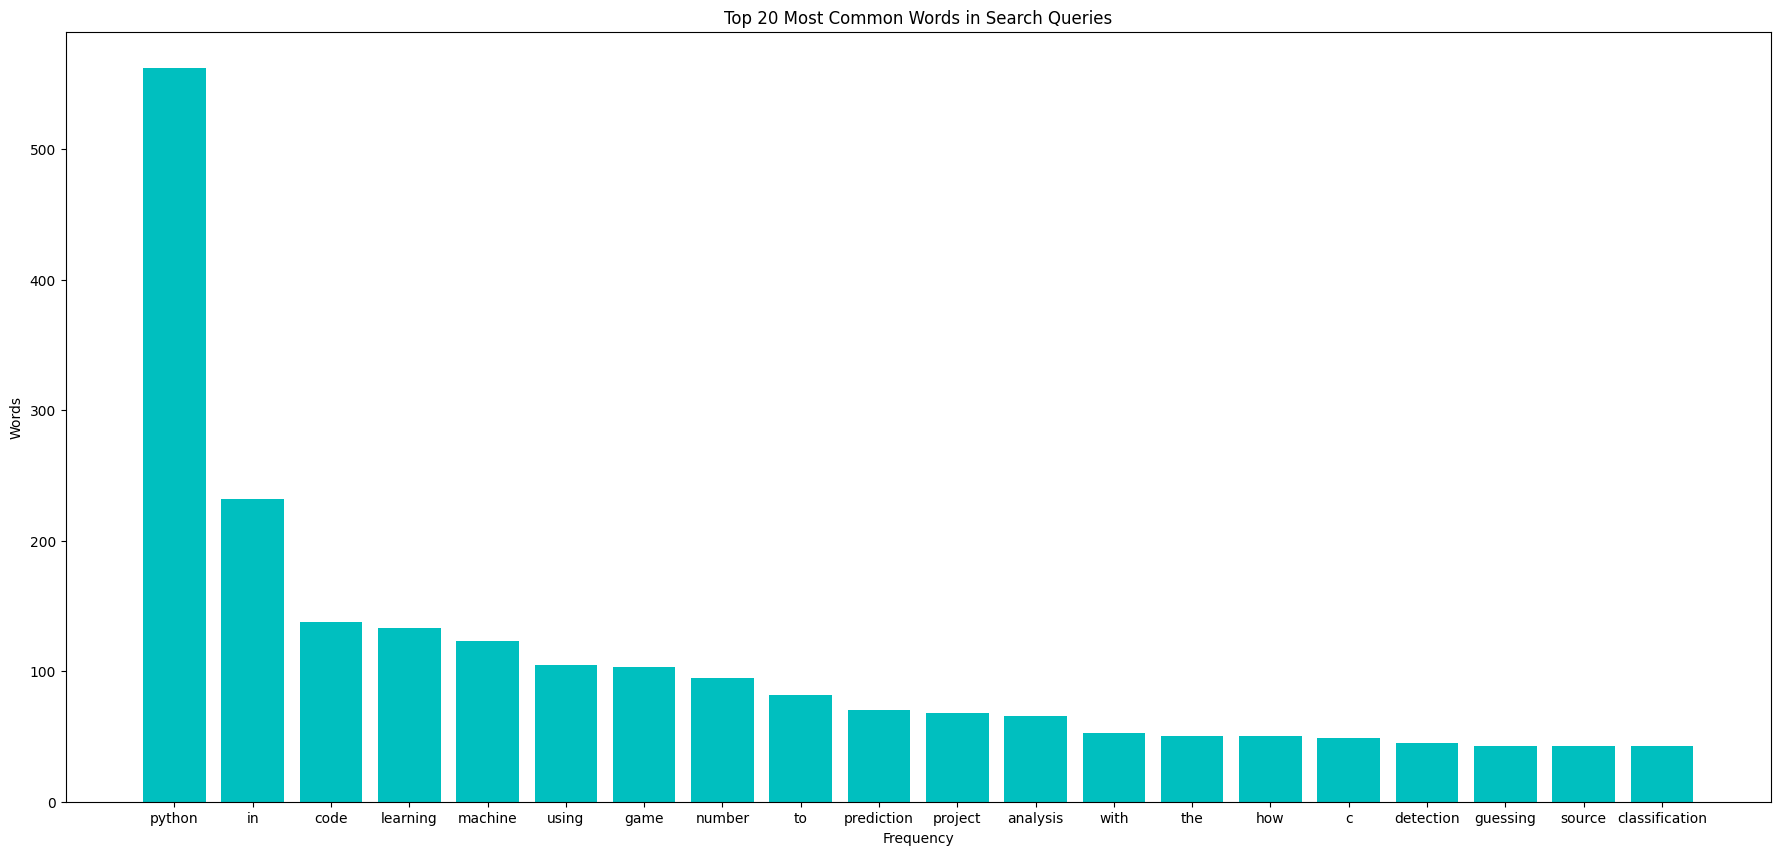

In [186]:
plt.figure(figsize=(22,10))
plt.bar(words, frequencies, color = 'c')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Search Queries')
plt.show()

### Q.4: Look at the top queries by clicks and impressions


In [187]:
top_queries_clicks = data.sort_values(by='Clicks', ascending=False).head(10)
top_queries_impressions = data.sort_values(by='Impressions', ascending=False).head(10)

In [188]:
display(top_queries_clicks[['Top queries', 'Clicks']])

,Top queries,Clicks
0,number guessing game python,5223
1,thecleverprogrammer,2809
2,python projects with source code,2077
3,classification report in machine learning,2012
4,the clever programmer,1931
5,standard scaler in machine learning,1559
6,aman kharwal,1490
7,python turtle graphics code,1455
8,python game projects with source code,1421
9,82 python projects with source code,1343


In [189]:
display(top_queries_impressions[['Top queries', 'Impressions']])

,Top queries,Impressions
2,python projects with source code,73380
82,r2 score,56322
34,machine learning roadmap,42715
21,classification report,39896
232,standardscaler,39267
91,facebook programming languages,36055
15,rock paper scissors python,35824
36,pandas datareader,26663
180,classification_report,24917
54,pandas_datareader,24689


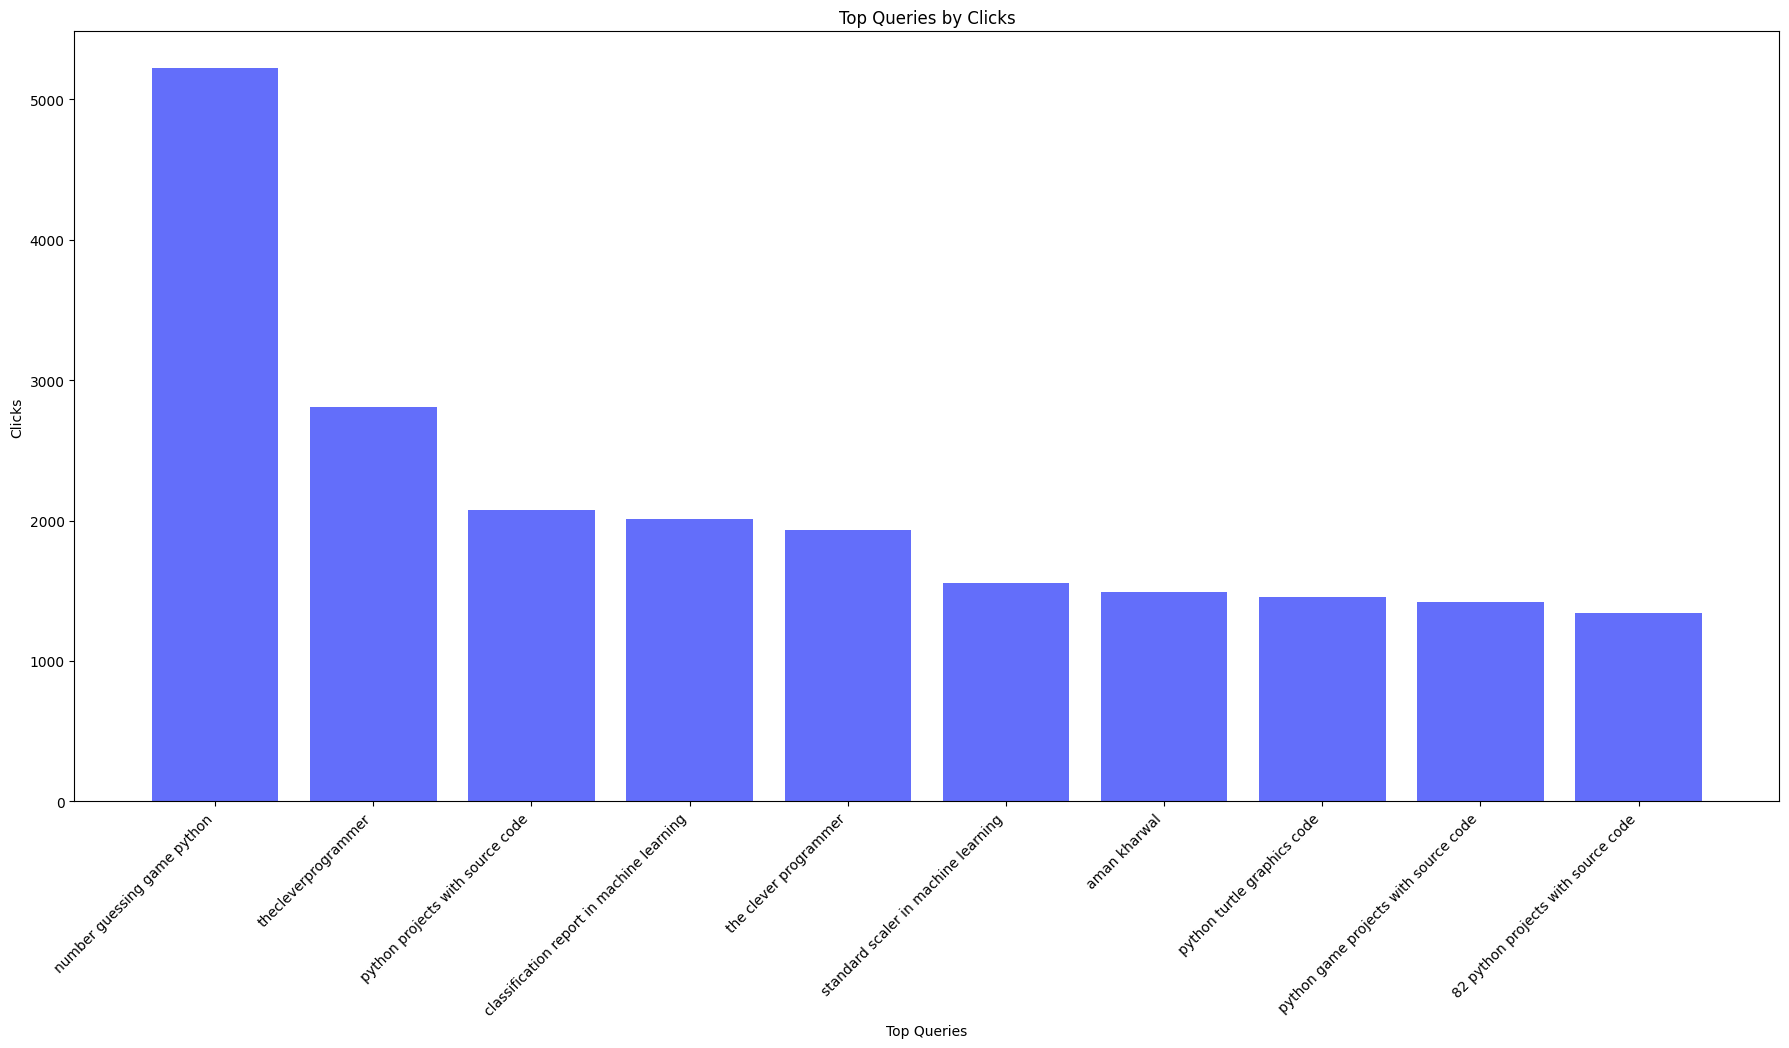

In [190]:
plt.figure(figsize=(22,10))
plt.bar(top_queries_clicks['Top queries'], top_queries_clicks['Clicks'], color='#636EFA')
plt.xlabel('Top Queries')
plt.ylabel('Clicks')
plt.title('Top Queries by Clicks')
plt.xticks(rotation=45, ha='right')
plt.show()

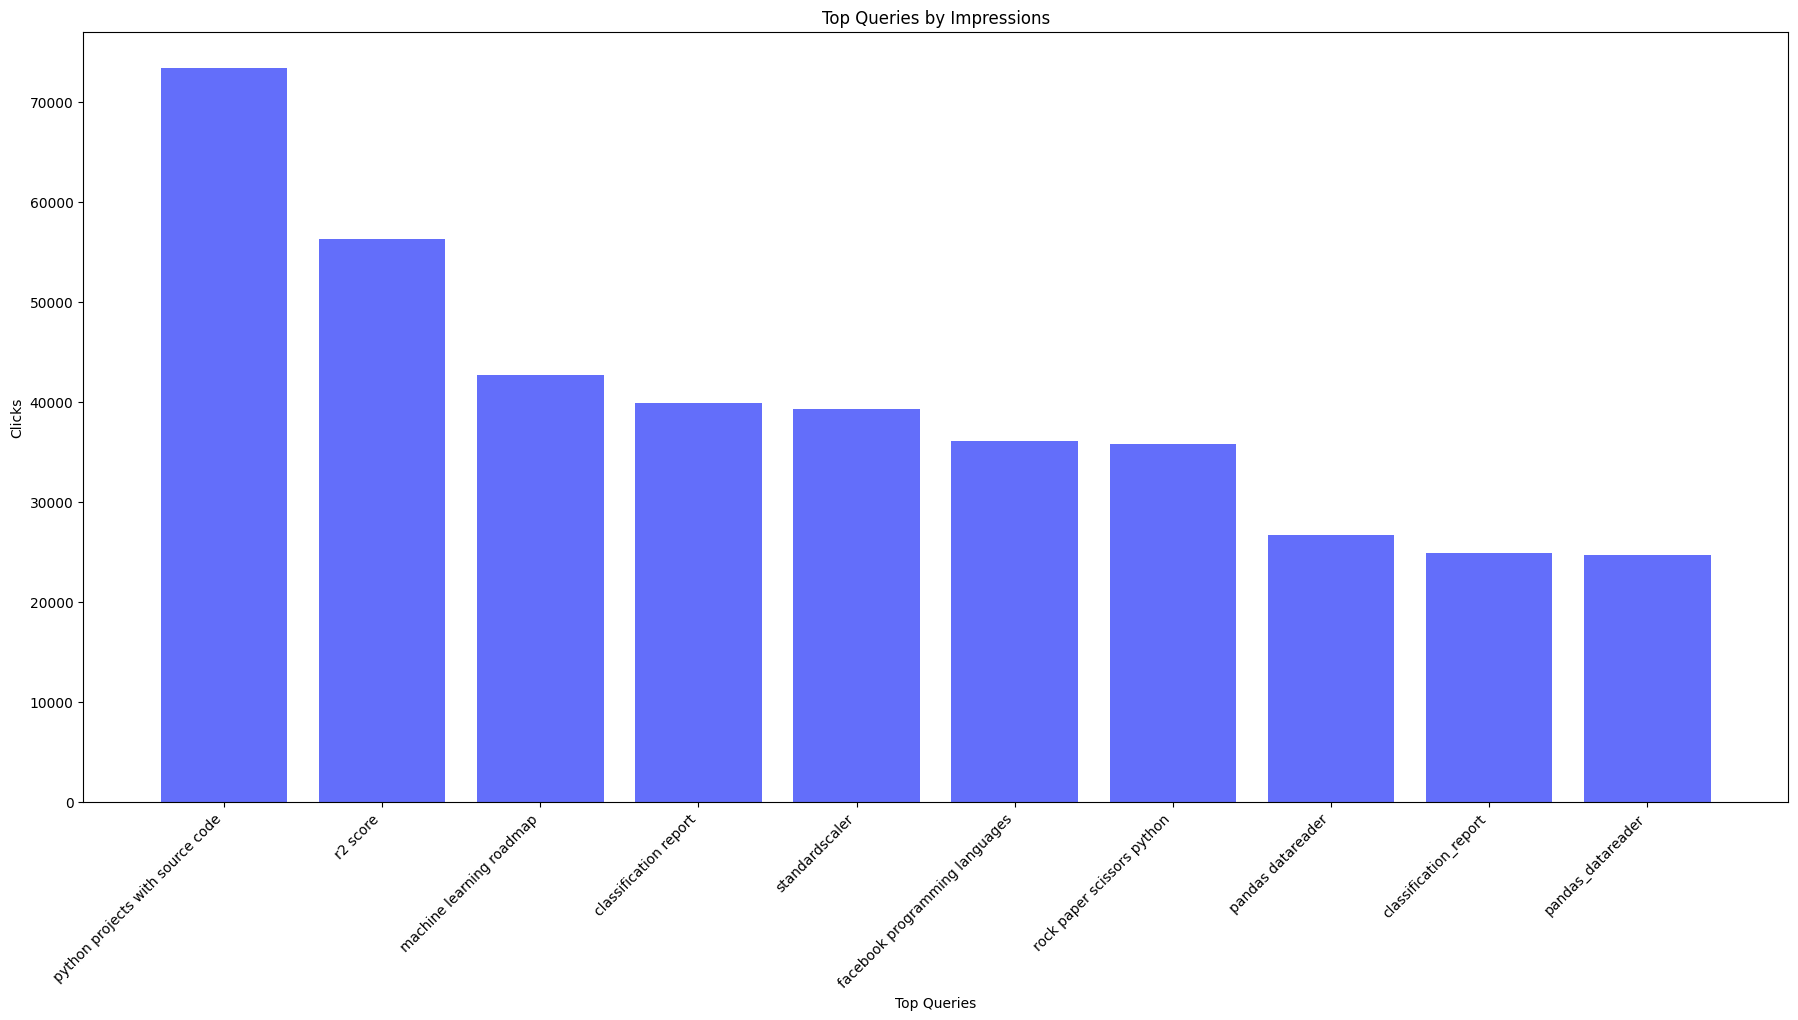

In [191]:
plt.figure(figsize=(22,10))
plt.bar(top_queries_impressions['Top queries'], top_queries_impressions['Impressions'], color='#636EFA')
plt.xlabel('Top Queries')
plt.ylabel('Clicks')
plt.title('Top Queries by Impressions')
plt.xticks(rotation=45, ha='right')
plt.show()

### Q.5: Now analyze the queries with the highest and lowest CTRs

In [192]:
highest_ctrs = data.sort_values(by='CTR', ascending=False).head(10)
lowest_ctrs = data.sort_values(by='CTR', ascending=True).head(10)

In [193]:
print("The Highest CTRS are:")
display(highest_ctrs)

The Highest CTRS are:


,Top queries,Clicks,Impressions,CTR,Position
928,the cleverprogrammer.com,53,62,0.8548,1.00
927,the clever programmer.com,53,64,0.8281,1.00
1,thecleverprogrammer,2809,3456,0.8128,1.02
732,the clever programmer python project,66,84,0.7857,1.00
307,the clever programmer machine learning projects,140,181,0.7735,1.00
4,the clever programmer,1931,2528,0.7638,1.09
964,python program to send otp to mobile,51,72,0.7083,1.12
95,the card game code in python,341,509,0.6699,1.00
771,write a python program that calculates number ...,63,95,0.6632,1.00
137,python program to calculate number of seconds ...,270,410,0.6585,1.02


In [194]:
print("The Lowest CTRS are:")
display(lowest_ctrs)

The Lowest CTRS are:


,Top queries,Clicks,Impressions,CTR,Position
929,python turtle,52,18228,0.0029,18.75
232,standardscaler,177,39267,0.0045,10.23
423,classification report sklearn,109,22969,0.0047,9.08
544,standard scaler,86,17800,0.0048,9.68
981,r2 score sklearn,49,7871,0.0062,7.92
82,r2 score,367,56322,0.0065,9.33
536,python source code,87,12983,0.0067,11.97
684,turtle graphics,71,10096,0.0070,10.05
664,online payment fraud detection,73,10368,0.0070,16.88
858,water quality analysis,56,7359,0.0076,27.56


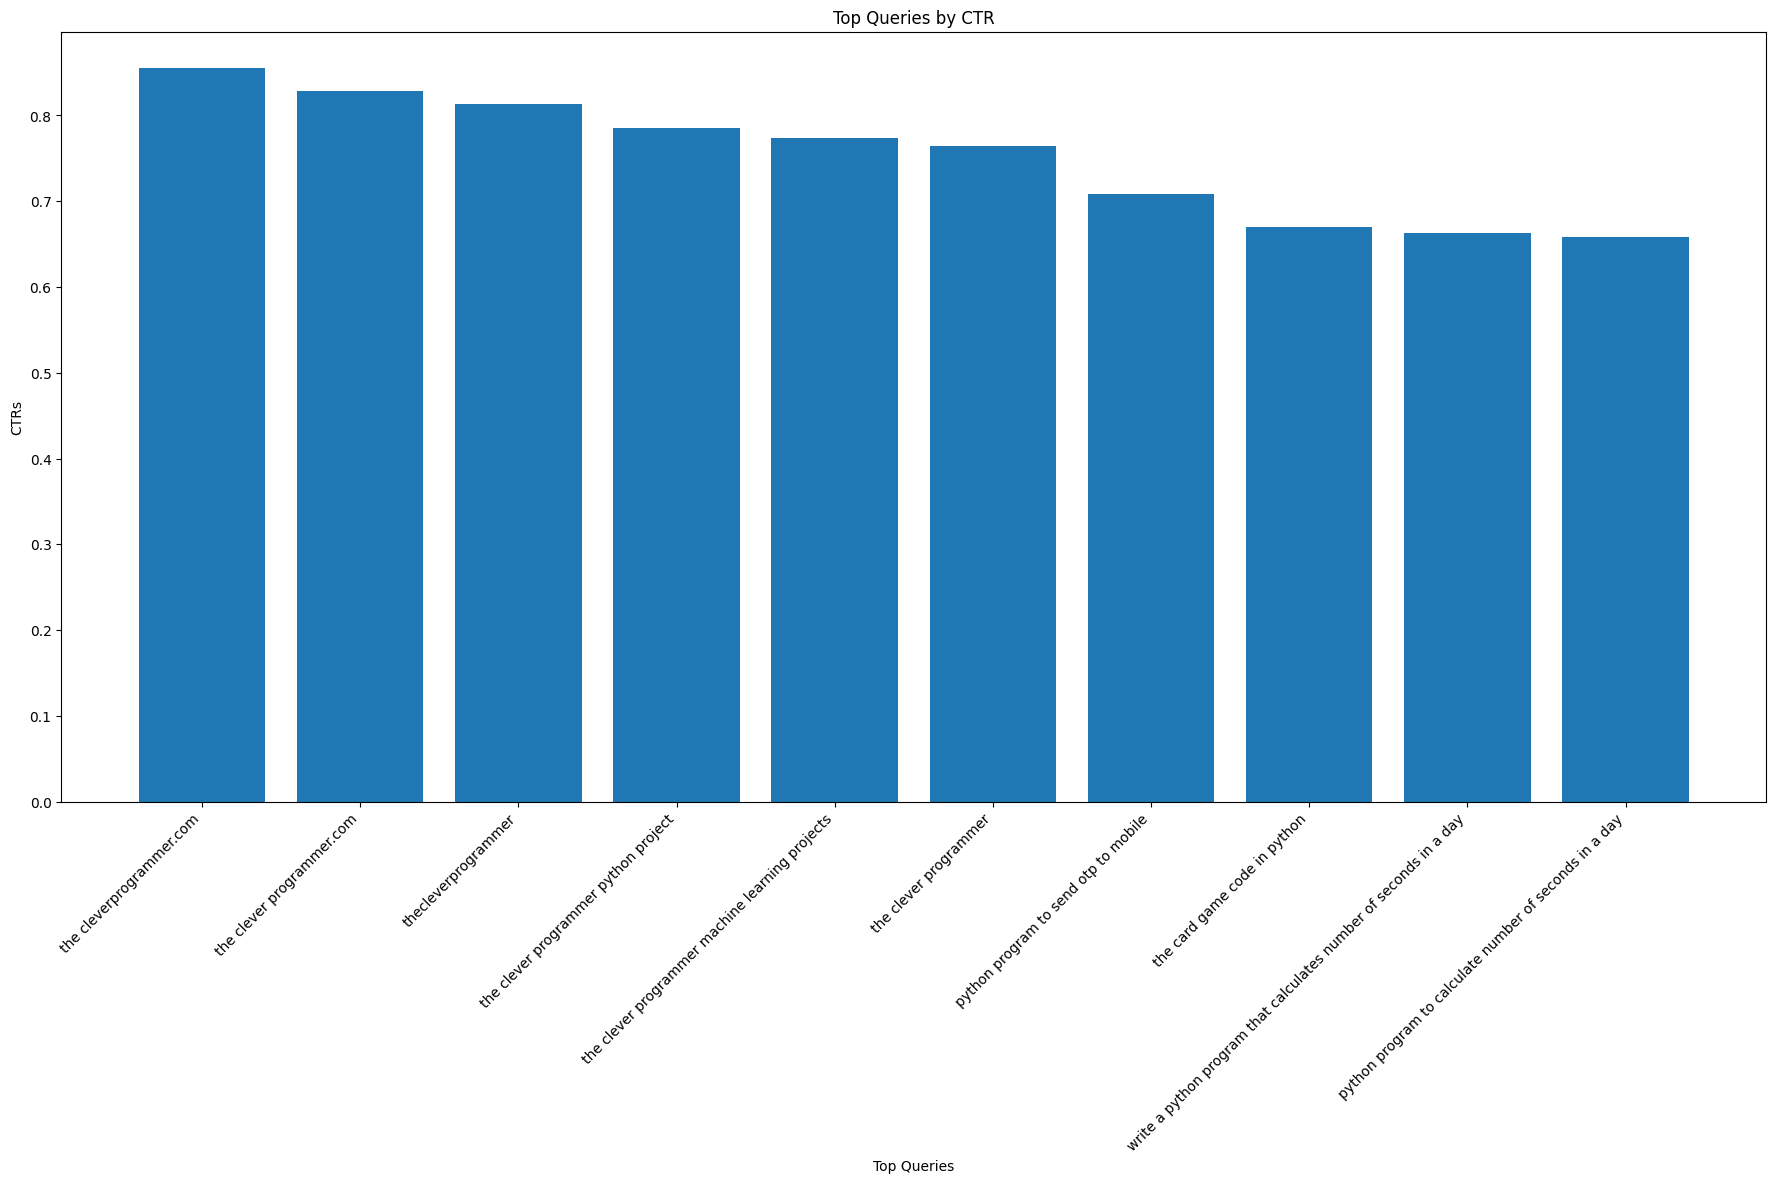

In [195]:
plt.figure(figsize=(22,10))
plt.bar(highest_ctrs['Top queries'], highest_ctrs['CTR'])
plt.xlabel('Top Queries')
plt.ylabel('CTRs')
plt.title('Top Queries by CTR')
plt.xticks(rotation=45, ha='right')
plt.show()

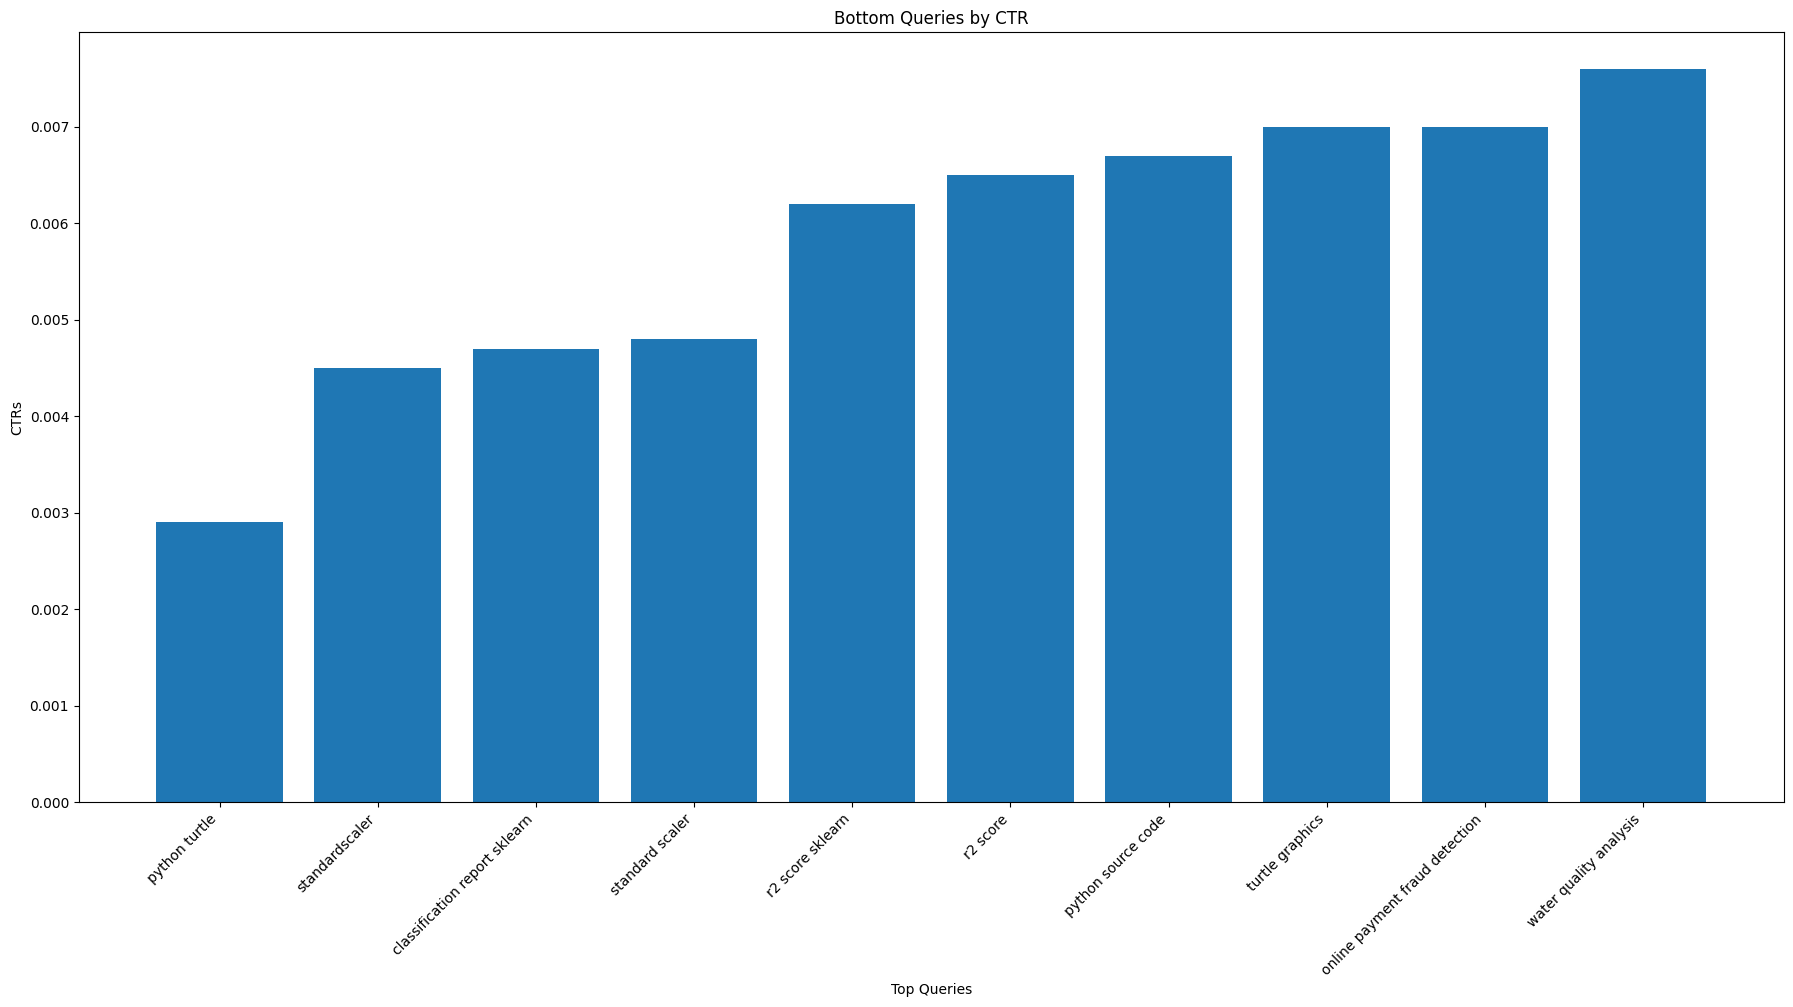

In [196]:
plt.figure(figsize=(22,10))
plt.bar(lowest_ctrs['Top queries'], lowest_ctrs['CTR'])
plt.xlabel('Top Queries')
plt.ylabel('CTRs')
plt.title('Bottom Queries by CTR')
plt.xticks(rotation=45, ha='right')
plt.show()

### Q.6: Now check the correlation between different metrics. Also explain your observation from the correlation matrix

<Axes: >

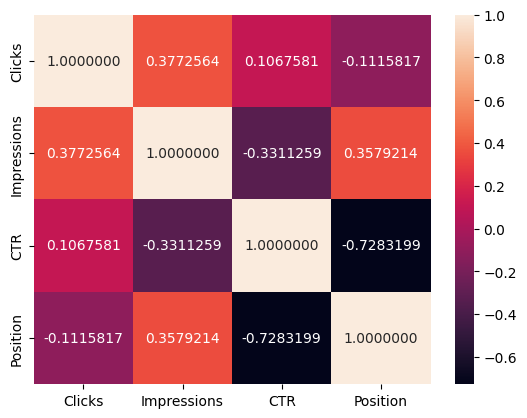

In [202]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Display the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".7f") # fmt=".7f" to match the task value

### Q.7: Now, detect anomalies in search queries. You can use various techniques for anomaly detection. A simple and effective method is the Isolation Forest algorithm, which works well with different data distributions and is efficient with large datasets.

In [203]:
# Numerical Features

features = data[['Clicks', 'Impressions', 'CTR', 'Position']]

In [208]:
# Implementing Model

model = IsolationForest(contamination=0.05)
data['anomaly'] = model.fit_predict(features)

In [209]:
anomalies = data[data['anomaly'] == -1]
display(anomalies)

,Top queries,Clicks,Impressions,CTR,Position,anomaly
0,number guessing game python,5223,14578,0.3583,1.61,-1
1,thecleverprogrammer,2809,3456,0.8128,1.02,-1
2,python projects with source code,2077,73380,0.0283,5.94,-1
3,classification report in machine learning,2012,4959,0.4057,1.28,-1
4,the clever programmer,1931,2528,0.7638,1.09,-1
5,standard scaler in machine learning,1559,7292,0.2138,1.53,-1
6,aman kharwal,1490,5752,0.2590,3.75,-1
7,python turtle graphics code,1455,13585,0.1071,4.60,-1
8,python game projects with source code,1421,4946,0.2873,2.23,-1
9,82 python projects with source code,1343,3562,0.3770,1.32,-1


In [210]:
model2 = OneClassSVM()
data['anomaly'] = model.fit_predict(features)

In [211]:
anomalies2 = data[data['anomaly'] == -1]
display(anomalies2)

,Top queries,Clicks,Impressions,CTR,Position,anomaly
0,number guessing game python,5223,14578,0.3583,1.61,-1
1,thecleverprogrammer,2809,3456,0.8128,1.02,-1
2,python projects with source code,2077,73380,0.0283,5.94,-1
3,classification report in machine learning,2012,4959,0.4057,1.28,-1
4,the clever programmer,1931,2528,0.7638,1.09,-1
5,standard scaler in machine learning,1559,7292,0.2138,1.53,-1
6,aman kharwal,1490,5752,0.2590,3.75,-1
7,python turtle graphics code,1455,13585,0.1071,4.60,-1
8,python game projects with source code,1421,4946,0.2873,2.23,-1
9,82 python projects with source code,1343,3562,0.3770,1.32,-1
